In [ ]:
import pandas as pd
import numpy as np
from google.colab import files, drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/US_Accidents_Dec21_updated.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.shape

(2845342, 47)

In [ ]:
df["Amenity"].value_counts()

False    2817352
True       27990
Name: Amenity, dtype: int64

In [ ]:
df["Amenity"][df["Severity"] == 2].sum()

24962

In [ ]:
df.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [ ]:
print(df["Severity"].unique())

[3 2 4 1]


# Road Structures

In [ ]:
road_df = pd.DataFrame(columns = ["RoadStructure", "Severity_1", "Severity_2", "Severity_3", "Severity_4", "Severity"])
for col in df.select_dtypes(include=bool).columns:
  road_df = road_df.append({"RoadStructure":col,
                  "Severity_1":df[col][df["Severity"] == 1].sum(),
                  "Severity_2":df[col][df["Severity"] == 2].sum(),
                  "Severity_3":df[col][df["Severity"] == 3].sum(),
                  "Severity_4":df[col][df["Severity"] == 4].sum(),
                  "Severity":df[col].sum()}, ignore_index=True)

<ipython-input-10-db47a6993a39>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  road_df = road_df.append({"RoadStructure":col,
<ipython-input-10-db47a6993a39>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  road_df = road_df.append({"RoadStructure":col,
<ipython-input-10-db47a6993a39>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  road_df = road_df.append({"RoadStructure":col,
<ipython-input-10-db47a6993a39>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  road_df = road_df.append({"RoadStructure":col,
<ipython-input-10-db47a6993a39>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

In [ ]:
road_df.head()

,RoadStructure,Severity_1,Severity_2,Severity_3,Severity_4,Severity
0,Amenity,546,24962,1097,1385,27990
1,Bump,12,968,26,15,1021
2,Crossing,8640,175886,7515,8171,200212
3,Give_Way,153,5655,478,582,6868
4,Junction,2269,242135,31026,15075,290505


In [ ]:
road_df.shape

(13, 6)

In [ ]:
road_df.to_csv("road_df.csv", index=False)

In [ ]:
road_df_1 = pd.DataFrame()
for col in df.select_dtypes(include=bool).columns:
  for severity in df["Severity"].unique():
    road_df_1 = road_df_1.append({"RoadStructure":col,
                                  "Severity": severity,
                                  "Count":df[col][df["Severity"] == severity].sum()}, ignore_index=True)

<ipython-input-14-9b80f921a688>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  road_df_1 = road_df_1.append({"RoadStructure":col,
<ipython-input-14-9b80f921a688>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  road_df_1 = road_df_1.append({"RoadStructure":col,
<ipython-input-14-9b80f921a688>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  road_df_1 = road_df_1.append({"RoadStructure":col,
<ipython-input-14-9b80f921a688>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  road_df_1 = road_df_1.append({"RoadStructure":col,
<ipython-input-14-9b80f921a688>:4: FutureWarning: The frame.append method is deprecated and will be removed from pan

In [ ]:
road_df_1.shape

(52, 3)

In [ ]:
road_df_1.head()

,RoadStructure,Severity,Count
0,Amenity,3,1097
1,Amenity,2,24962
2,Amenity,4,1385
3,Amenity,1,546
4,Bump,3,26


In [ ]:
road_df_1[road_df_1["RoadStructure"] == "Turning_Loop"]

,RoadStructure,Severity,Count
48,Turning_Loop,3,0
49,Turning_Loop,2,0
50,Turning_Loop,4,0
51,Turning_Loop,1,0


In [ ]:
road_df_1.to_csv("road_df_1.csv", index=False)

Time, Day/Night, Road Structures

# Time Processing

In [ ]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["End_Time"] = pd.to_datetime(df["End_Time"])

df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Day"] = df["Start_Time"].dt.day
df["DayOfWeek"] = df["Start_Time"].dt.day_name()
df["HourofDay"] = df["Start_Time"].dt.hour

df["Duration"] = df["End_Time"] - df["Start_Time"]
df["Duration_Minutes"] = df["Duration"].dt.total_seconds() / 60
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,DayOfWeek,HourofDay,Duration,Duration_Minutes
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,Night,Night,Night,2016,2,8,Monday,0,0 days 06:00:00,360.000000
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,Night,Night,Night,2016,2,8,Monday,5,0 days 06:00:00,360.000000
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,Night,Night,Day,2016,2,8,Monday,6,0 days 06:00:00,360.000000
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,Night,Day,Day,2016,2,8,Monday,6,0 days 06:00:00,360.000000
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,Day,Day,Day,2016,2,8,Monday,7,0 days 06:00:00,360.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,Day,Day,Day,2019,8,23,Friday,18,0 days 00:28:36,28.600000
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,Day,Day,Day,2019,8,23,Friday,19,0 days 00:26:53,26.883333
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,Day,Day,Day,2019,8,23,Friday,19,0 days 00:28:28,28.466667
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,Day,Day,Day,2019,8,23,Friday,19,0 days 00:29:21,29.350000


In [ ]:
df["Duration_Minutes"].describe()

count    2.845342e+06
mean     3.590335e+02
std      9.329918e+03
min      2.000000e+00
25%      7.398333e+01
50%      1.200000e+02
75%      2.236833e+02
max      1.682579e+06
Name: Duration_Minutes, dtype: float64

In [ ]:
df.to_csv("time_processed_df.csv", index=False)

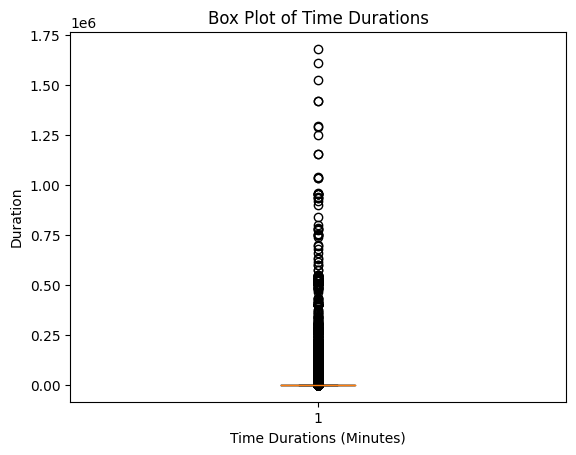

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df["Duration_Minutes"])
plt.xlabel('Time Durations (Minutes)')
plt.ylabel('Duration')
plt.title('Box Plot of Time Durations')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a pandas DataFrame called 'data'
weather_columns = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
dependent_variable = 'Severity'

# Select the relevant columns from the dataset
selected_columns = weather_columns + [dependent_variable]
subset_data = df[selected_columns]

# Generate the scatter plot matrix
sns.set(style="ticks")
scatter_matrix = sns.pairplot(subset_data, hue=dependent_variable, diag_kind="hist", plot_kws={"alpha": 0.5})

# Customize the scatter plot matrix
scatter_matrix.fig.suptitle("Scatter Plot Matrix")
plt.show()